In [2]:
from matplotlib import pylab as plt
import numpy as np
from scipy.stats import multivariate_normal
import random
%matplotlib inline

In [1]:
def importdata(filename):
    count = 0
    data = []
    for line in open(filename):
        if count == 0:
            count += 1
            continue
        count += 1
        temp = []
        for word in line.split(' '):
            if word:
                if word[-1] == "\n":
                    word= word[:-1]
                temp.append(float(word))
        data.append(np.array(temp[1:]))
    return data
        

In [3]:
train_data = importdata('data.txt')

In [4]:
train_data

[array([  3.6,  79. ]),
 array([  1.8,  54. ]),
 array([  3.333,  74.   ]),
 array([  2.283,  62.   ]),
 array([  4.533,  85.   ]),
 array([  2.883,  55.   ]),
 array([  4.7,  88. ]),
 array([  3.6,  85. ]),
 array([  1.95,  51.  ]),
 array([  4.35,  85.  ]),
 array([  1.833,  54.   ]),
 array([  3.917,  84.   ]),
 array([  4.2,  78. ]),
 array([  1.75,  47.  ]),
 array([  4.7,  83. ]),
 array([  2.167,  52.   ]),
 array([  1.75,  62.  ]),
 array([  4.8,  84. ]),
 array([  1.6,  52. ]),
 array([  4.25,  79.  ]),
 array([  1.8,  51. ]),
 array([  1.75,  47.  ]),
 array([  3.45,  78.  ]),
 array([  3.067,  69.   ]),
 array([  4.533,  74.   ]),
 array([  3.6,  83. ]),
 array([  1.967,  55.   ]),
 array([  4.083,  76.   ]),
 array([  3.85,  78.  ]),
 array([  4.433,  79.   ]),
 array([  4.3,  73. ]),
 array([  4.467,  77.   ]),
 array([  3.367,  66.   ]),
 array([  4.033,  80.   ]),
 array([  3.833,  74.   ]),
 array([  2.017,  52.   ]),
 array([  1.867,  48.   ]),
 array([  4.833,  80.   

In [5]:
x = []
y = []
for i in train_data:
    x.append(i[0])
    y.append(i[1])

In [6]:
def E(π, µ, v_0, v_1, train_data):
    #π = [π_1, π_2]
    #µ = [µ_1, µ_2]
    #v_0 = [[v_1,0], [0,v_2]]
    #v_1 = [[v_1,0], [0,v_2]]
    #return w, which len(w) = 2, len(w[i]) = 272, i is in {0,1}
    w = [[],[]]
    for vec in train_data:
        p = (π[0]*multivariate_normal.pdf(vec, µ[0], v_0))/((π[0]*multivariate_normal.pdf(vec, µ[0], v_0))+(π[1]*multivariate_normal.pdf(vec, µ[1], v_1)))
        w[0].append(p)
        w[1].append(1-p)
    return np.array(w)

In [7]:
def M(w, train_data):
    µ = np.array([[0.0,0.0],[0.0,0.0]])
    π = np.array([0.0]*2)
    N = np.array([0.0]*2)
    for i in range(len(train_data)):
        µ[0] += w[0][i]*train_data[i]
        µ[1] += w[1][i]*train_data[i]
        N[0] += w[0][i]
        N[1] += w[1][i]
    µ[0] /= sum(w[0])
    µ[1] /= sum(w[1])
    π[0] = N[0]/(sum(N))
    π[1]= 1-π[0]
    
    v_0 = np.array([[0.0]*2,[0.0]*2])
    v_1 = np.array([[0.0]*2,[0.0]*2])
    for i in range(len(train_data)):
        v_0[0][0] += w[0][i]*(train_data[i][0]-µ[0][0])**2
        v_0[1][1] += w[0][i]*(train_data[i][1]-µ[0][1])**2
        v_1[0][0] += w[1][i]*(train_data[i][0]-µ[1][0])**2
        v_1[1][1] += w[1][i]*(train_data[i][1]-µ[1][1])**2
    v_0[0] /= sum(w[0])
    v_0[1] /= sum(w[0])
    v_1[0] /= sum(w[1])
    v_1[1] /= sum(w[1])
    return [µ, π, v_0, v_1]

In [8]:
def EM_random(train_data):
    a = random.randint(0,len(train_data)-1);
    b = random.randint(0,len(train_data)-1)
    while a == b:
        b = random.randint(0,len(train_data)-1)
    c = random.random()
    π_old = np.array([c, 1-c])
    µ_old = [train_data[a],train_data[b]]
    v_0_old = np.array([[random.randint(1,100),0], [0,random.randint(1,100)]])
    v_1_old = np.array([[random.randint(1,100),0], [0,random.randint(1,100)]])
    center1_x = [µ_old[0][0]]
    center1_y = [µ_old[0][1]]
    center2_x = [µ_old[1][0]]
    center2_y = [µ_old[1][1]]
    w = E(π_old, µ_old, v_0_old, v_1_old, train_data)
    [µ, π, v_0, v_1] = M(w, train_data)
    #print("µ:\n",µ)
    #print("π:\n",π)
    #print("v_0:\n",v_0)
    #print("v_1:\n",v_1)
    #print("\n")

    con1 = abs(µ_old[0][0]-µ[0][0]) < 0.0000000001 and abs(µ_old[0][1]-µ[0][1]) < 0.0000000001 
    con2 = abs(µ_old[1][0]-µ[1][0]) < 0.0000000001 and abs(µ_old[1][1]-µ[1][1]) < 0.0000000001
    count = 0
    while not con1 or not con2:
        count += 1
        π_old = π
        µ_old = µ
        v_0_old = v_0
        v_1_old = v_1
        center1_x += [µ_old[0][0]]
        center1_y += [µ_old[0][1]]
        center2_x += [µ_old[1][0]]
        center2_y += [µ_old[1][1]]
        w = E(π_old, µ_old, v_0_old, v_1_old, train_data)
        [µ, π, v_0, v_1] = M(w, train_data)
        #print("µ:\n",µ)
        #print("π:\n",π)
        #print("v_0:\n",v_0)
        #print("v_1:\n",v_1)
        #print("\n")
        
        con1 = abs(µ_old[0][0]-µ[0][0]) < 0.0000000001 and abs(µ_old[0][1]-µ[0][1]) < 0.0000000001 
        con2 = abs(µ_old[1][0]-µ[1][0]) < 0.0000000001 and abs(µ_old[1][1]-µ[1][1]) < 0.0000000001
    return [[center1_x,center1_y],[center2_x,center2_y],µ, count ,v_0, v_1]

CPU times: user 2.03 s, sys: 29.8 ms, total: 2.06 s
Wall time: 2.19 s
13


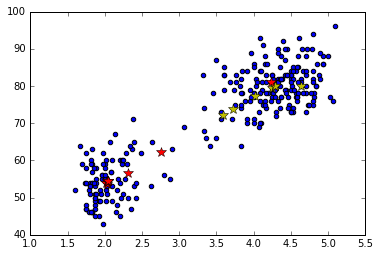

In [10]:
%time [path_1, path_2, µ, count, v_0, v_1] = EM_random(train_data)
print(count)
plt.figure(1)
plt.scatter(x,y)
plt.plot(path_1[0],path_1[1],'y*',markersize=10)
plt.plot(path_2[0],path_2[1],'r*',markersize=10)
#A, b = np.random.multivariate_normal(a[2][0], a[-2],500).T
#plt.plot(A, b, 'x')
#c, d = np.random.multivariate_normal(a[2][1], a[-1],500).T
#plt.plot(c, d, 'x')
plt.show()

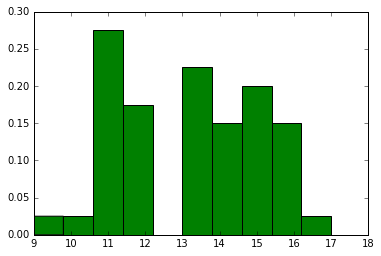

In [13]:
def computeDis(n):
    dtb = []
    for i in range(n):
        [path_1, path_2, µ, count, v_0, v_1] = EM_random(train_data)
        dtb.append(count)
    return dtb
dtb = computeDis(50)
#dtb = []
#for i in range(50):
    #dtb.append(random.randint(0,10))
plt.hist(dtb,normed=True,color='g') 
#pyplot.title('Normalized histogram of digits count')
plt.show()

In [14]:
def KMeans_2(data,size_dic):
    ##p = kmeans.cluster_centers_
    ##label = kmeans.labels_
    a = random.randint(0,len(data)-1)
    b = random.randint(0,len(data)-1)
    while a==b:
        b = random.randint(0,len(data)-1)
    p = np.array([data[a], data[b]])
    print("point_init1 is ",a)
    print("point_init2 is ",b)
    label = [0]*len(data)
    conver = False
    count = 0
    while not conver:
        count += 1
        conver = True
        for i in range(len(data)):
            d = [0]*2
            d[0] = np.linalg.norm(p[0]-data[i])
            d[1] = np.linalg.norm(p[1]-data[i])
            if d[label[i]] > d[1-label[i]]:
                conver = False
                label[i] = 1-label[i]
        if not conver:
            ##print("a")
            for j in [0,1]:
                n_p = 0
                s_p = np.array([0.0]*size_dic)
                for point in range(len(label)):
                    if label[point] == j:
                        s_p += data[point]
                        n_p += 1
                p[j] = s_p/n_p
    #print("iterate time is ",count)
    return(label, p)

In [15]:
def EM_kmeans(train_data, π_old, µ_old, v_0_old, v_1_old):
    center1_x = [µ_old[0][0]]
    center1_y = [µ_old[0][1]]
    center2_x = [µ_old[1][0]]
    center2_y = [µ_old[1][1]]
    w = E(π_old, µ_old, v_0_old, v_1_old, train_data)
    [µ, π, v_0, v_1] = M(w, train_data)
    #print("µ:\n",µ)
    #print("π:\n",π)
    #print("v_0:\n",v_0)
    #print("v_1:\n",v_1)
    #print("\n")

    con1 = abs(µ_old[0][0]-µ[0][0]) < 0.0000000001 and abs(µ_old[0][1]-µ[0][1]) < 0.0000000001 
    con2 = abs(µ_old[1][0]-µ[1][0]) < 0.0000000001 and abs(µ_old[1][1]-µ[1][1]) < 0.0000000001
    count = 0
    while not con1 or not con2:
        count += 1
        π_old = π
        µ_old = µ
        v_0_old = v_0
        v_1_old = v_1
        center1_x += [µ_old[0][0]]
        center1_y += [µ_old[0][1]]
        center2_x += [µ_old[1][0]]
        center2_y += [µ_old[1][1]]
        w = E(π_old, µ_old, v_0_old, v_1_old, train_data)
        [µ, π, v_0, v_1] = M(w, train_data)
        #print("µ:\n",µ)
        #print("π:\n",π)
        #print("v_0:\n",v_0)
        #print("v_1:\n",v_1)
        #print("\n")
        
        con1 = abs(µ_old[0][0]-µ[0][0]) < 0.0000000001 and abs(µ_old[0][1]-µ[0][1]) < 0.0000000001 
        con2 = abs(µ_old[1][0]-µ[1][0]) < 0.0000000001 and abs(µ_old[1][1]-µ[1][1]) < 0.0000000001
    return [[center1_x,center1_y],[center2_x,center2_y],µ, count,v_0, v_1]

In [16]:
def pre_kmeans(train_data):
    (label, µ_old) = KMeans_2(train_data,2)
    n = 0
    v_0 = np.array([[0.0]*2,[0.0]*2])
    v_1 = np.array([[0.0]*2,[0.0]*2])
    for i in range(len(label)):
        n += label[i]
        if label[i]:
            v_1[0][0] += (train_data[i][0]-µ_old[1][0])**2
            v_1[1][1] += (train_data[i][1]-µ_old[1][1])**2
        else:
            v_0[0][0] += (train_data[i][0]-µ[0][0])**2
            v_0[1][1] += (train_data[i][1]-µ[0][1])**2
    
    v_0[0] /= len(label)-n
    v_0[1] /= len(label)-n
    v_1[0] /= n
    v_1[1] /= n 
    π_old = [1-n/len(label),n/len(label)]
    return [π_old,µ_old,v_0,v_1]

point_init1 is  150
point_init2 is  108
11


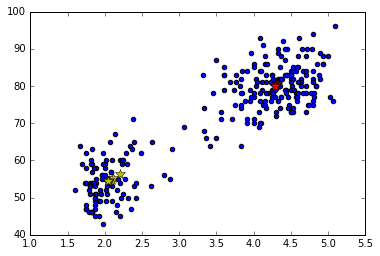

In [18]:
[π_old,µ_old,v_0,v_1] = pre_kmeans(train_data)
[path_1, path_2, µ, count, v_0, v_1] = EM_kmeans(train_data,π_old,µ_old,v_0,v_1)
print(count)
plt.figure(1)
plt.scatter(x,y)
plt.plot(path_1[0],path_1[1],'y*',markersize=10)
plt.plot(path_2[0],path_2[1],'r*',markersize=10)
plt.show()

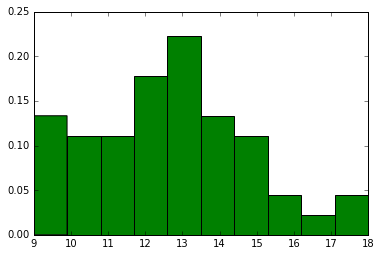

In [19]:
def pre_k_dis(n):
    dtb = []
    for i in range(n):
        [π_old,µ_old,v_0,v_1] = pre_kmeans(train_data)
        [path_1, path_2, µ, count, v_0, v_1] = EM_kmeans(train_data,π_old,µ_old,v_0,v_1)
        dtb.append(count)
    return dtb
                   
dtb = computeDis(50)
#dtb = []
#for i in range(50):
    #dtb.append(random.randint(0,10))
plt.hist(dtb,normed=True,color='g') 
#pyplot.title('Normalized histogram of digits count')
plt.show()